# Deep Learning on AWS

## Module 1 Demo

In [1]:
%%bash
pip install mglearn

  Running setup.py bdist_wheel for mglearn: started
  Running setup.py bdist_wheel for mglearn: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# 샘플 데이터


scikit-learn



In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
iris_dataset['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
iris_dataset['target'][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_dataset['target_names'][0]

'setosa'

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [10]:
iris_dataset['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [0]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [12]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [13]:
X_train[:10]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5]])

# k-최근접 이웃 알고리즘

[k-최근접 이웃 알고리즘이란? - 위키백과](https://ko.wikipedia.org/wiki/K-%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

In [0]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([0, 0, 1, 1])

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
z  = np.array([[-1,-1],[2,0]])
print(knn.predict(z))

[1 0]


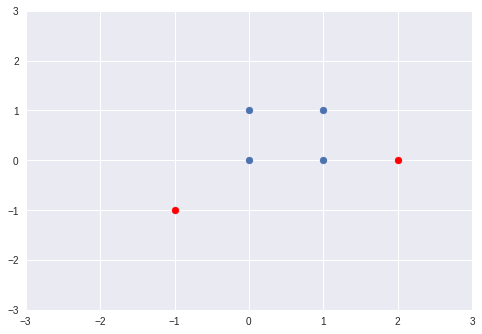

In [17]:
import matplotlib.pyplot as plt

plt.xlim(-3.0, 3.0)
plt.ylim(-3.0, 3.0)

plt.scatter(x[:,0],x[:,1])
plt.scatter(z[:,0], z[:,1],c='red')

---
# 결정 트리

[결정 트리란? - 위키백과](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC)

In [35]:
%%bash

pip install pydotplus

In [0]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(iris_dataset.data, iris_dataset.target)

In [37]:
pre = dtree.predict(X_train)
sum(pre == y_train) / len(y_train)

0.9732142857142857

In [0]:
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.grid_search import GridSearchCV

In [0]:
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data, feature_names=iris_dataset.feature_names,
                         class_names=iris_dataset.target_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [41]:
%%bash
apt-get update -y

Hit:1 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists...


In [43]:
%%bash
apt-get install python-pydot -y --allow-unauthenticated

Reading package lists...
Building dependency tree...
Reading state information...
python-pydot is already the newest version (1.0.28-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


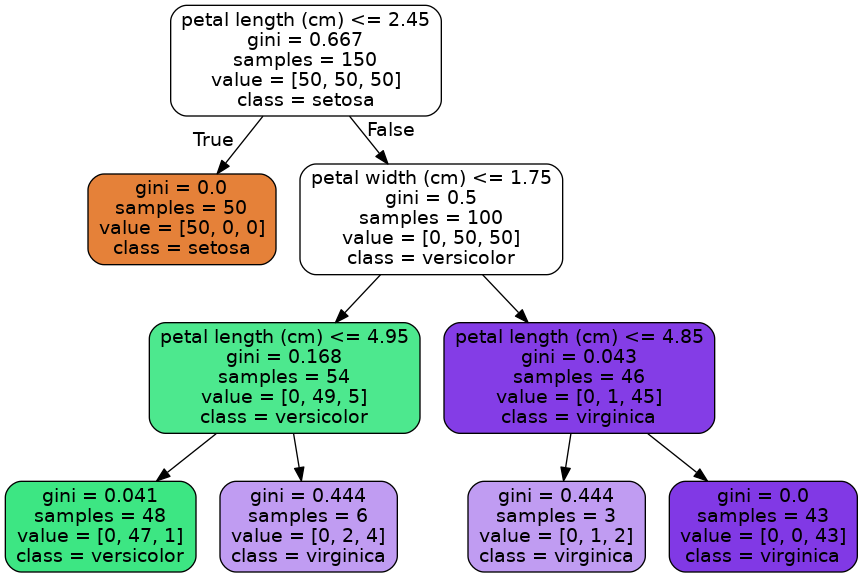

In [44]:
from IPython.display import Image
Image(graph.create_png())

---
#K-평균 알고리즘

[K-평균 알고리즘](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

In [0]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=1000,centers=3,cluster_std=2.3, random_state=3)

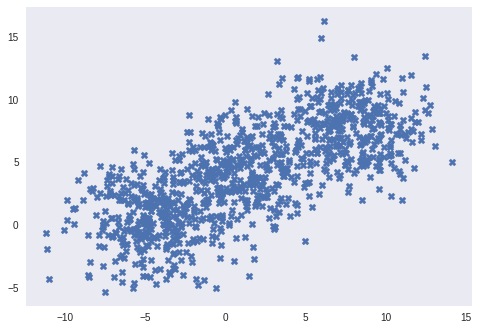

In [48]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1],marker='X')
plt.grid()
plt.show()

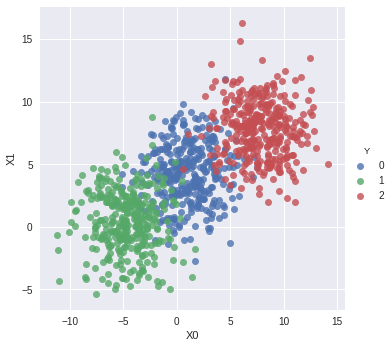

In [49]:
import seaborn as sns

dt = pd.concat([pd.DataFrame(x, columns=["X0","X1"]),pd.DataFrame(y,columns=["Y"])],axis=1)
sns.lmplot("X0","X1",data=dt,hue="Y",fit_reg=False)

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,init='random',n_init=1,max_iter=1000,random_state=1)
cl = km.fit_predict(x)

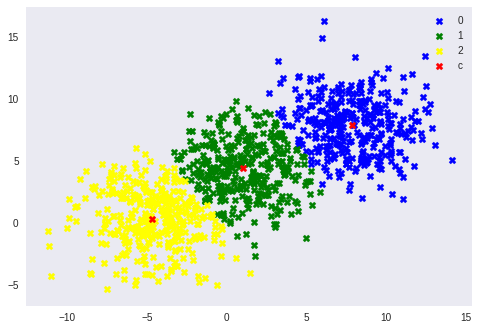

In [51]:
plt.scatter(x[cl==0,0],x[cl==0,1],marker='X',c='blue',label='0')
plt.scatter(x[cl==1,0],x[cl==1,1],marker='X',c='green',label='1')
plt.scatter(x[cl==2,0],x[cl==2,1],marker='X',c='yellow',label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='X',c='red',label='c')
plt.legend()
plt.grid()
plt.show()